In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("amazon.csv")

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# Section A: 
Data Understanding & Cleaning: Understand the dataset like a data scientist in a product analytics team.

**1. Summarizing the dataset:**

(i) Number of unique users, products, and reviews:

In [4]:
#Getting unique users with unique user_ids and doing the same for products and reviews

print("Number of unique users: ", df['user_id'].nunique())
print("Number of unique products: ", df['product_id'].nunique())
print("Number of unique reviews: ", df['review_id'].nunique())

Number of unique users:  1194
Number of unique products:  1351
Number of unique reviews:  1194


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

(ii) Top 5 categories by number of products

In [5]:
#Top 5 categories by number of products

df.groupby('category')['product_id'].nunique().sort_values(ascending=False).head()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    161
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|WearableTechnology|SmartWatches                                           62
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         60
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          51
Name: product_id, dtype: int64

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

(iii) Price range and discount insights

In [6]:

#Converting price columns to numeric by removing ₹ and % to get better insight for price and discounts 

df['discounted_price'] = df['discounted_price'].str.replace('₹', '',regex=False).str.replace(',', '',regex=False)
df['actual_price'] = df['actual_price'].str.replace('₹', '',regex=False).str.replace(',', '',regex=False)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '',regex=False)

#Converting price columns to numeric after removing ₹ and %

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

#handling the missing values by replacing the respective fields by replacing them with the mean of that category

df['discounted_price'].fillna(df.groupby('category')['discounted_price'].transform('mean'), inplace=True)
df['actual_price'].fillna(df.groupby('category')['actual_price'].transform('mean'), inplace=True)
df['discount_percentage'].fillna(df.groupby('category')['discount_percentage'].transform('mean'), inplace=True)


In [7]:
print(" Basic Price and Discount Stats:")
print(f"Actual Price → Min: ₹{df['actual_price'].min():,.0f}, Max: ₹{df['actual_price'].max():,.0f}, Mean: ₹{df['actual_price'].mean():,.0f}")
print(f"Discounted Price → Min: ₹{df['discounted_price'].min():,.0f}, Max: ₹{df['discounted_price'].max():,.0f}, Mean: ₹{df['discounted_price'].mean():,.0f}")
print(f"Discount % → Min: {df['discount_percentage'].min():.0f}%, Max: {df['discount_percentage'].max():.0f}%, Mean: {df['discount_percentage'].mean():.1f}%")


 Basic Price and Discount Stats:
Actual Price → Min: ₹39, Max: ₹139,900, Mean: ₹5,445
Discounted Price → Min: ₹39, Max: ₹77,990, Mean: ₹3,125
Discount % → Min: 0%, Max: 94%, Mean: 47.7%


In [8]:
# Bucket actual price into ranges
df['price_bucket'] = pd.cut(df['actual_price'], bins=[0, 500, 1000, 2000, 5000, 10000, 20000, df['actual_price'].max()],
                            labels=['<500', '500–1K', '1K–2K', '2K–5K', '5K–10K', '10K–20K', '>20K'])

# Count how many products fall in each bucket
print("\n Product Count by Price Range:")
print(df['price_bucket'].value_counts().sort_index())



 Product Count by Price Range:
price_bucket
<500       220
500–1K     321
1K–2K      329
2K–5K      274
5K–10K     132
10K–20K     92
>20K        97
Name: count, dtype: int64


In [9]:
discount_by_bucket = df.groupby('price_bucket')['discount_percentage'].mean().sort_index()

print("\nAvg Discount % by Price Range:")
print(discount_by_bucket.round(1))



Avg Discount % by Price Range:
price_bucket
<500       40.6
500–1K     54.7
1K–2K      49.9
2K–5K      46.6
5K–10K     51.9
10K–20K    41.7
>20K       35.8
Name: discount_percentage, dtype: float64


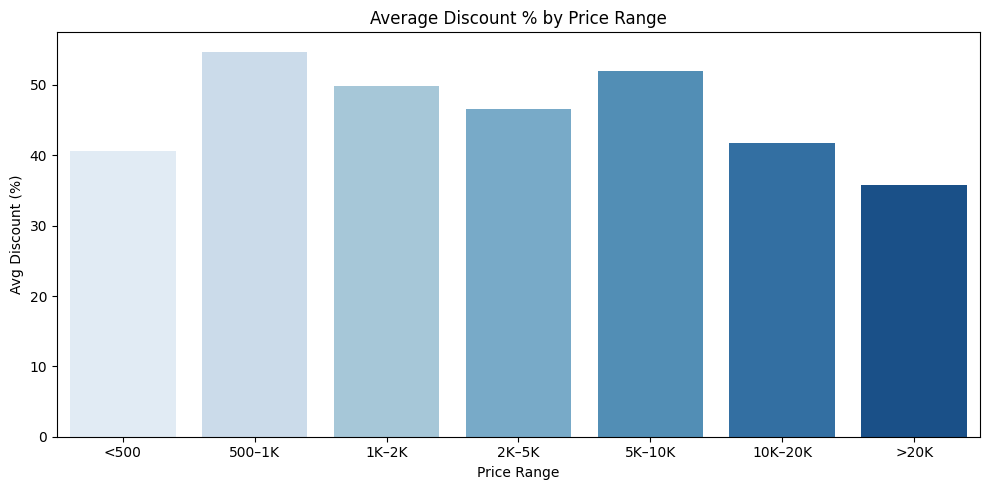

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=discount_by_bucket.index, y=discount_by_bucket.values, palette='Blues')
plt.title('Average Discount % by Price Range')
plt.ylabel('Avg Discount (%)')
plt.xlabel('Price Range')
plt.tight_layout()
plt.show()


**2. Cleaning and preprocessing the data:**

(i) Convert prices to numeric:

This is already done above for the price and discount insights 


In [11]:
#Copy-pasting the code from the previous cell
#Converting price columns to numeric by removing ₹ and % to get better insight for price and discounts 

# df['discounted_price'] = df['discounted_price'].str.replace('₹', '',regex=False).str.replace(',', '',regex=False)
# df['actual_price'] = df['actual_price'].str.replace('₹', '',regex=False).str.replace(',', '',regex=False)
# df['discount_percentage'] = df['discount_percentage'].str.replace('%', '',regex=False)

# #Converting price columns to numeric after removing ₹ and %

# df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
# df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
# df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# #handling the missing values by replacing the respective fields by replacing them with the mean of that category

# df['discounted_price'].fillna(df.groupby('category')['discounted_price'].transform('mean'), inplace=True)
# df['actual_price'].fillna(df.groupby('category')['actual_price'].transform('mean'), inplace=True)
# df['discount_percentage'].fillna(df.groupby('category')['discount_percentage'].transform('mean'), inplace=True)


(ii) Parse categories into hierarchy levels:

In [12]:

#Parsing categories into hierarchy levels
category_levels = df['category'].str.split('|', expand=True)

category_levels.columns = [f'category_level_{i+1}' for i in category_levels.columns]

df = pd.concat([df, category_levels], axis=1)


In [13]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,price_bucket,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,1K–2K,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,<500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1K–2K,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,500–1K,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,<500,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


(iii) Normalize rating scores and count outliers or Create derived features like price_difference, value_for_money_score, weighted ratings.

In [14]:
df['rating']=pd.to_numeric(df['rating'],errors='coerce')

In [15]:

print("Highest rating for any product:",df['rating'].max())
print("least rating for any product:",df['rating'].min())


Highest rating for any product: 5.0
least rating for any product: 2.0


In [16]:
#Replacing the missing values with the mean of the category before normalizing
df['rating'] = df['rating'].fillna(df.groupby('category')['rating'].transform('mean'))


In [17]:
#Normalizing the ratings

max_rating = df['rating'].max()
min_rating = df['rating'].min()
df['normalized_rating'] = (df['rating'] - min_rating) / (max_rating - min_rating)

In [18]:
#Counting outliers using IQR method

Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['rating'] < lower_bound) | (df['rating'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 74


In [19]:
#Creating price difference colomn 

df['price_difference'] = df['actual_price'] - df['discounted_price']



Defining my value for Money score as normalized_rating*discount_percentage

In [20]:
df['vmf'] = df['normalized_rating'] * df['discount_percentage']

In [21]:
#Normalizing vmf score
df['vmf']= (df['vmf']-df['vmf'].min())/(df['vmf'].max()-df['vmf'].min())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1465 non-null   object  
 1   product_name         1465 non-null   object  
 2   category             1465 non-null   object  
 3   discounted_price     1465 non-null   float64 
 4   actual_price         1465 non-null   float64 
 5   discount_percentage  1465 non-null   int64   
 6   rating               1465 non-null   float64 
 7   rating_count         1463 non-null   object  
 8   about_product        1465 non-null   object  
 9   user_id              1465 non-null   object  
 10  user_name            1465 non-null   object  
 11  review_id            1465 non-null   object  
 12  review_title         1465 non-null   object  
 13  review_content       1465 non-null   object  
 14  img_link             1465 non-null   object  
 15  product_link         

# Section B:

**Exploratory Data Analysis:**

(i) Most reviewed products Visualize top 10 categories by number of products.

In [23]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['rating_count'] = df['rating_count'].fillna(df.groupby('category')['rating_count'].transform('mean'))


In [24]:
category_ratings = df.groupby('category')['rating_count'].sum().sort_values(ascending=False).head(10)


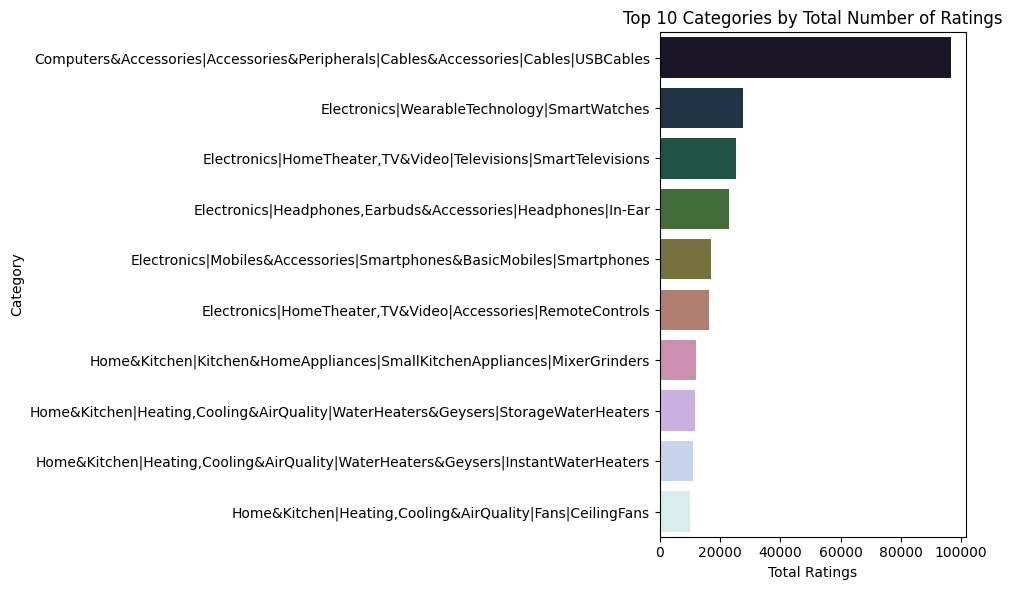

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='cubehelix')
plt.title('Top 10 Categories by Total Number of Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

(ii) Average rating per category

In [26]:
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
top_avg_rating = avg_rating_per_category.head(10)

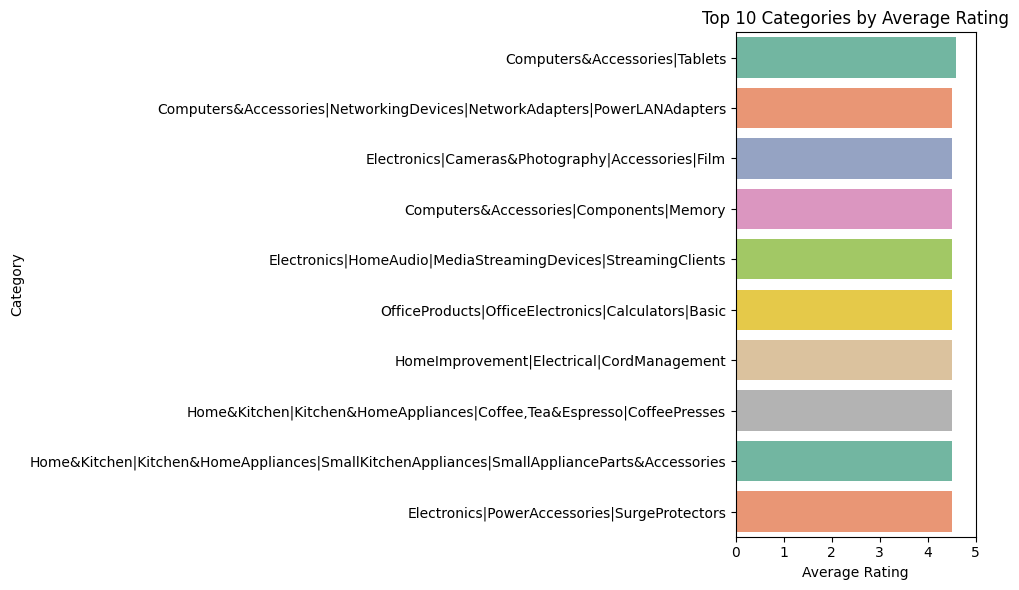

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_avg_rating.values, y=top_avg_rating.index, palette='Set2')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xlim(0, 5)  # Ratings are between 0 and 5
plt.tight_layout()
plt.show()

(iii) Discounts vs actual price correlation


In [28]:
correlation = df['discount_percentage'].corr(df['actual_price'])
print("Correlation between discount_percentage and actual_price:", correlation)


Correlation between discount_percentage and actual_price: -0.11809753487735941


In [29]:
def remove_outliers_iqr(df, column):    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


As actual_price increases, the discount_percentage tends to slightly decrease.

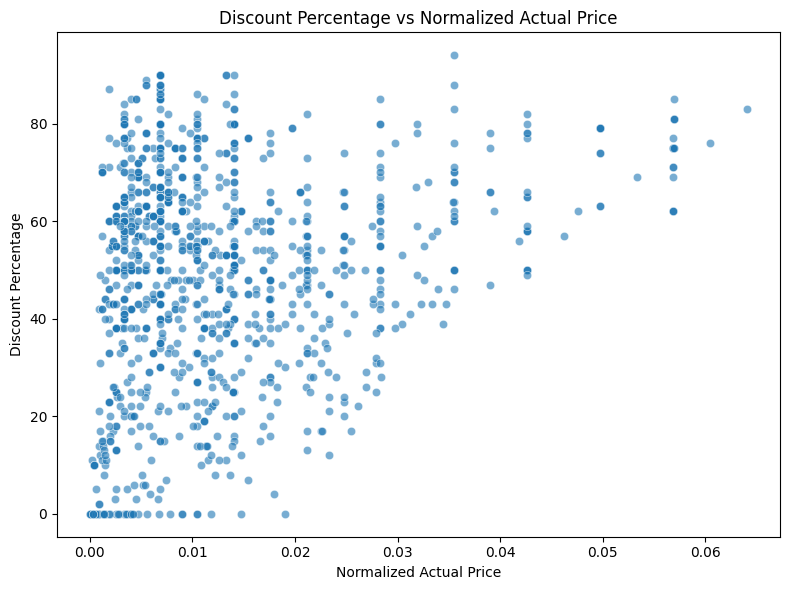

In [30]:
df['normalized_actual_price'] = (df['actual_price'] - df['actual_price'].min())/(df['actual_price'].max() - df['actual_price'].min())
df['normalized_discounted_price'] = (df['discounted_price'] - df['discounted_price'].min())/(df['discounted_price'].max() - df['discounted_price'].min())


#Removing outliers for a better plot

df = remove_outliers_iqr(df, 'normalized_actual_price')
df = remove_outliers_iqr(df, 'normalized_discounted_price')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='normalized_actual_price', y='discount_percentage', alpha=0.6)
plt.title('Discount Percentage vs Normalized Actual Price')
plt.xlabel('Normalized Actual Price')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()

In [31]:
correlation = df['normalized_actual_price'].corr(df['discount_percentage'])
print("Correlation between normalized_actual_price and discount_percentage after removing outliers :", correlation)


Correlation between normalized_actual_price and discount_percentage after removing outliers : 0.19799208714935673


After cleaning the data, there's a mild tendency for higher-priced products (normalized) to have higher discounts.

In [32]:
#Defining random thresholds 
high_rating_threshold = 4.5
low_review_threshold = 50

high_rating_low_review = df[(df['rating'] >= high_rating_threshold) & (df['rating_count'] <= low_review_threshold)]
high_rating_low_review[['product_name', 'rating', 'rating_count']].sort_values(by='rating', ascending=False)


,product_name,rating,rating_count
174,Syncwire LTG to USB Cable for Fast Charging Co...,5.0,5.0
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,5.0,23.0
1201,"Oratech Coffee Frother electric, milk frother ...",4.8,28.0
886,"Logitech M331 Silent Plus Wireless Mouse, 2.4G...",4.6,23.0
1293,Melbon VM-905 2000-Watt Room Heater (ISI Certi...,4.6,9.0
853,Logitech Pebble M350 Wireless Mouse with Bluet...,4.6,23.0
547,Noise_Colorfit Smart Watch Charger 2 Pin USB F...,4.5,38.0
612,"Dell MS116 1000Dpi USB Wired Optical Mouse, Le...",4.5,23.0
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",4.5,23.0
866,Lenovo 600 Bluetooth 5.0 Silent Mouse: Compact...,4.5,23.0


In [33]:
correlation = df['rating'].corr(df['rating_count'])
print("Correlation between rating and rating_count:", correlation)

Correlation between rating and rating_count: 0.08696088516794502


This is a very weak positive correlation — close to zero.



Highly rated products are not necessarily heavily reviewed, and vice versa.



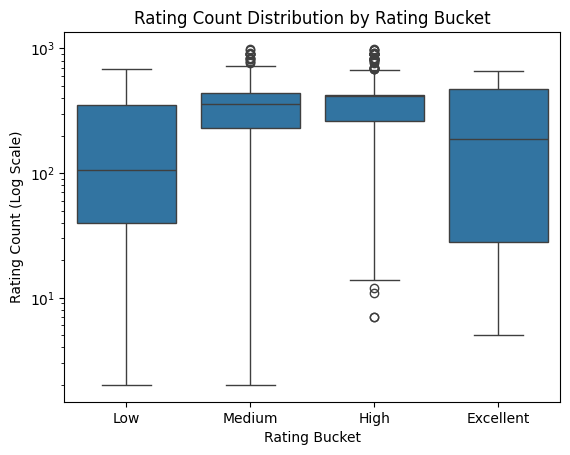

In [34]:
df['rating_bucket'] = pd.cut(df['rating'], bins=[1.9, 3, 4, 4.5, 5.1], labels=['Low', 'Medium', 'High', 'Excellent'])
df.groupby('rating_bucket')['rating_count'].mean()
sns.boxplot(data=df, x='rating_bucket', y='rating_count')
plt.yscale('log')  # Helps visualize outliers
plt.title('Rating Count Distribution by Rating Bucket')
plt.xlabel('Rating Bucket')
plt.ylabel('Rating Count (Log Scale)')
plt.show()


**Insight 1: Weak Correlation Between Rating and Review Count**

The correlation between rating and rating_count is very weak (~+0.087).
This implies that popular products (many reviews) are not always the highest rated, and vice versa.



**Insight 2: Discounts Are More Common on Mid-Range Products**

After removing outliers, the correlation between normalized_actual_price and discount_percentage became mildly positive (+0.198).
Higher-priced products are slightly more likely to have better discounts, but the trend is not strong.

**Insight 3: Computer Accessories have the highest number of ratings**

This can be clearly seen the above plot

# Section C:

**Content-Based Filtering:** 
Act like a content engineer personalizing user feeds based on product metadata.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, 0 to 1464
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   product_id                   1180 non-null   object  
 1   product_name                 1180 non-null   object  
 2   category                     1180 non-null   object  
 3   discounted_price             1180 non-null   float64 
 4   actual_price                 1180 non-null   float64 
 5   discount_percentage          1180 non-null   int64   
 6   rating                       1180 non-null   float64 
 7   rating_count                 905 non-null    float64 
 8   about_product                1180 non-null   object  
 9   user_id                      1180 non-null   object  
 10  user_name                    1180 non-null   object  
 11  review_id                    1180 non-null   object  
 12  review_title                 1180 non-null   object  
 13  review_c

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['combined_text'] = df['product_name'] + ' ' + df['about_product']
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['combined_text'])


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=df['product_id'], columns=df['product_id'])


In [38]:
def recommend_for_new_product(new_text, tfidf_vectorizer, tfidf_matrix, df, top_n=5):
    new_vec = tfidf_vectorizer.transform([new_text])
    similarity_scores = cosine_similarity(new_vec, tfidf_matrix).flatten()
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    
    return df.iloc[top_indices][['product_id', 'product_name', 'rating', 'rating_count']]


In [39]:
new_product_text = "Bluetooth Noise Cancelling Headphones with Long Battery Life"
recommend_for_new_product(new_product_text, tfidf, tfidf_matrix, df)
new_product_text = "Wireless noise-cancelling headphones with long battery life and deep bass"
recommend_for_new_product(new_product_text, tfidf, tfidf_matrix, df)



,product_id,product_name,rating,rating_count
879,B09YLFHFDW,Sony WI-C100 Wireless Headphones with Customiz...,3.6,441.0
479,B01DF26V7A,"JBL C100SI Wired In Ear Headphones with Mic, J...",4.1,441.0
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,3.5,NaN
656,B07LG59NPV,Boult Audio Probass Curve Bluetooth Wireless i...,3.8,441.0
753,B07W6VWZ8C,"Infinity (JBL Fuze Pint, Wireless Ultra Portab...",4.1,418.0


In [40]:

def recommend_similar_better_product(product_id, tfidf_matrix, df, min_rating=4.0):
    if product_id not in df['product_id'].values:
        raise ValueError(f"Product ID '{product_id}' not found in dataset.")
    
    idx = df.index[df['product_id'] == product_id][0]
    
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    
    df['similarity'] = sim_scores

    filtered = df[(df['product_id'] != product_id) & (df['rating'] >= min_rating)]

    recommended = filtered.sort_values(by='similarity', ascending=False).head(1)

    return recommended[['product_id', 'product_name', 'rating', 'rating_count', 'similarity']]

In [41]:
low_rated_product_id = df[df['rating'] < 3.0].iloc[0]['product_id']

recommend_similar_better_product(low_rated_product_id, tfidf_matrix, df)


,product_id,product_name,rating,rating_count,similarity
711,B06XSK3XL6,boAt Dual Port Rapid Car Charger (Qualcomm Cer...,4.3,NaN,1.0


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
category_matrix = ohe.fit_transform(df[['category']])

scaler = MinMaxScaler()
price_discount_matrix = scaler.fit_transform(df[['actual_price', 'discount_percentage']])  # shape: (n_samples, 2)

from scipy.sparse import csr_matrix
price_discount_sparse = csr_matrix(price_discount_matrix)

enhanced_matrix = hstack([tfidf_matrix, category_matrix, price_discount_sparse])

similarities = cosine_similarity(enhanced_matrix[0], enhanced_matrix).flatten()
top_indices = similarities.argsort()[::-1][1:6]
df.iloc[top_indices][['product_id', 'product_name', 'category', 'rating', 'actual_price', 'discount_percentage']]


,product_id,product_name,category,rating,actual_price,discount_percentage
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,1099.0,64
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,1099.0,64
220,B07JH1CBGW,Wayona Nylon Braided Usb Syncing And Charging ...,Computers&Accessories|Accessories&Peripherals|...,4.2,1999.0,68
42,B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...,Computers&Accessories|Accessories&Peripherals|...,4.2,1099.0,64
89,B07JH1C41D,Wayona Nylon Braided (2 Pack) Lightning Fast U...,Computers&Accessories|Accessories&Peripherals|...,4.2,1999.0,68


In [43]:
def evaluate_relevance(product_id, tfidf_matrix, df, top_k=5):
    idx = df.index[df['product_id'] == product_id][0]
    target_vec = tfidf_matrix[idx]
    similarities = cosine_similarity(target_vec, tfidf_matrix).flatten()
    
    df['similarity'] = similarities
    top_k_df = df[df['product_id'] != product_id].sort_values(by='similarity', ascending=False).head(top_k)
    
    original = df.loc[idx]
    relevance_metrics = {
        'avg_similarity': top_k_df['similarity'].mean(),
        'avg_rating_diff': (top_k_df['rating'] - original['rating']).abs().mean(),
        'category_match_rate': (top_k_df['category'] == original['category']).mean(),
        'avg_price_diff': (top_k_df['actual_price'] - original['actual_price']).abs().mean()
    }
    return relevance_metrics


In [44]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy

def evaluate_diversity(top_k_df, tfidf_matrix, df):
    indices = top_k_df.index.tolist()
    top_vectors = tfidf_matrix[indices].toarray()

    # Intra-list similarity (lower = more diverse)
    pairwise_sims = cosine_similarity(top_vectors)
    avg_intra_similarity = (pairwise_sims.sum() - len(indices)) / (len(indices)*(len(indices)-1))

    # Category entropy
    category_counts = top_k_df['category'].value_counts(normalize=True)
    cat_entropy = entropy(category_counts)

    return {
        'avg_intra_similarity': avg_intra_similarity,
        'category_entropy': cat_entropy,
        'price_std': top_k_df['actual_price'].std()
    }


# Section D: 
**Collaborative Filtering (User–Item) :**
 Now you're a machine learning engineer building smart recommendations using user behavior.


In [45]:
user_item_matrix = df.pivot_table(
    index='user_id',
    columns='product_id',
    values='rating'
)


In [46]:
user_item_filled = user_item_matrix.fillna(0)
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

item_item_similarity = cosine_similarity(user_item_filled.T)
item_similarity_df = pd.DataFrame(item_item_similarity,
                                  index=user_item_filled.columns,
                                  columns=user_item_filled.columns)


In [47]:
def recommend_top_n_items(user_id, user_item_matrix, item_similarity_df, top_n=5):
    user_ratings = user_item_matrix.loc[user_id]
    
    unrated_items = user_ratings[user_ratings.isna()].index
    
    scores = {}
    for item in unrated_items:
        similar_items = item_similarity_df[item]
        rated_items = user_ratings.dropna()
        score = (similar_items[rated_items.index] * rated_items).sum() / (abs(similar_items[rated_items.index]).sum() + 1e-9)
        scores[item] = score
    
    top_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item for item, score in top_items]


In [48]:
sample_user = user_item_matrix.index[0]
recommend_top_n_items(sample_user, user_item_matrix, item_similarity_df)


['B002PD61Y4', 'B002SZEOLG', 'B003B00484', 'B003L62T7W', 'B004IO5BMQ']

# Section E:
**Hybrid Recommender (Content + Collaborative) :**
 Step into the role of a senior ML engineer combining models for better performance.


In [49]:
def predict_cf_score(user_id, user_item_matrix, item_similarity_df):
    user_ratings = user_item_matrix.loc[user_id]
    scores = {}
    
    for item in user_ratings[user_ratings.isna()].index:
        sim_items = item_similarity_df[item]
        rated = user_ratings.dropna()
        score = (sim_items[rated.index] * rated).sum() / (abs(sim_items[rated.index]).sum() + 1e-9)
        scores[item] = score
    
    return scores

def predict_content_score(user_id, user_item_matrix, content_similarity_df):
    user_ratings = user_item_matrix.loc[user_id]
    scores = {}
    
    for item in user_ratings[user_ratings.isna()].index:
        sim_items = content_similarity_df[item]
        rated = user_ratings.dropna()
        score = (sim_items[rated.index] * rated).sum() / (abs(sim_items[rated.index]).sum() + 1e-9)
        scores[item] = score
    
    return scores

def hybrid_recommend(user_id, user_item_matrix, item_similarity_df, content_similarity_df, top_n=5):
    cf_scores = predict_cf_score(user_id, user_item_matrix, item_similarity_df)
    content_scores = predict_content_score(user_id, user_item_matrix, content_similarity_df)
    
    hybrid_scores = {}
    all_unrated = set(cf_scores.keys()).union(content_scores.keys())
    
    for item in all_unrated:
        cf = cf_scores.get(item, 0)
        content = content_scores.get(item, 0)
        hybrid_scores[item] = 0.6 * cf + 0.4 * content

    top_items = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item for item, score in top_items]


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, 0 to 1464
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   product_id                   1180 non-null   object  
 1   product_name                 1180 non-null   object  
 2   category                     1180 non-null   object  
 3   discounted_price             1180 non-null   float64 
 4   actual_price                 1180 non-null   float64 
 5   discount_percentage          1180 non-null   int64   
 6   rating                       1180 non-null   float64 
 7   rating_count                 905 non-null    float64 
 8   about_product                1180 non-null   object  
 9   user_id                      1180 non-null   object  
 10  user_name                    1180 non-null   object  
 11  review_id                    1180 non-null   object  
 12  review_title                 1180 non-null   object  
 13  review_c

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances


df['combined_text'] = df['product_name'] + ' ' + df['about_product']

user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

product_texts = df.drop_duplicates('product_id')[['product_id', 'combined_text']].set_index('product_id')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(product_texts['combined_text'])
content_similarity_df = pd.DataFrame(cosine_similarity(tfidf_matrix), index=product_texts.index, columns=product_texts.index)

cf_similarity_df = pd.DataFrame(cosine_similarity(user_item_matrix.fillna(0).T), 
                                index=user_item_matrix.columns, columns=user_item_matrix.columns)

def hybrid_recommend(user_id, user_item_matrix, cf_sim_df, content_sim_df, top_n=5):
    user_ratings = user_item_matrix.loc[user_id]
    unrated_items = user_ratings[user_ratings.isna()].index

    hybrid_scores = {}

    for item in unrated_items:
        rated_items = user_ratings.dropna().index

        cf_score = sum(cf_sim_df.loc[item, rated] * user_ratings[rated] for rated in rated_items if rated in cf_sim_df.columns) / \
                   (sum(abs(cf_sim_df.loc[item, rated]) for rated in rated_items if rated in cf_sim_df.columns) + 1e-9)
        
        content_score = sum(content_sim_df.loc[item, rated] * user_ratings[rated] for rated in rated_items if rated in content_sim_df.columns) / \
                        (sum(abs(content_sim_df.loc[item, rated]) for rated in rated_items if rated in content_sim_df.columns) + 1e-9)

        hybrid_score = 0.6 * cf_score + 0.4 * content_score
        hybrid_scores[item] = hybrid_score

    top_items = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return pd.DataFrame(top_items, columns=['product_id', 'hybrid_score'])

hybrid_recommend(df['user_id'][0], user_item_matrix, cf_similarity_df, content_similarity_df)


,product_id,hybrid_score
0,B07JPJJZ2H,1.68
1,B095244Q22,1.68
2,B07JNVF678,1.68
3,B07F1P8KNV,1.68
4,B0B2DJDCPX,1.68


In [52]:
# Step 1: Define CF-only recommender
def cf_recommend(user_id, user_item_matrix, cf_sim_df, top_n=2):
    user_ratings = user_item_matrix.loc[user_id]
    unrated_items = user_ratings[user_ratings.isna()].index

    scores = {}
    for item in unrated_items:
        rated_items = user_ratings.dropna().index
        score = sum(cf_sim_df.loc[item, rated] * user_ratings[rated] for rated in rated_items if rated in cf_sim_df.columns) / \
                (sum(abs(cf_sim_df.loc[item, rated]) for rated in rated_items if rated in cf_sim_df.columns) + 1e-9)
        scores[item] = score

    top_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item for item, score in top_items]


# Step 2: Define Content-only recommender
def content_recommend(user_id, user_item_matrix, content_sim_df, top_n=2):
    user_ratings = user_item_matrix.loc[user_id]
    unrated_items = user_ratings[user_ratings.isna()].index

    scores = {}
    for item in unrated_items:
        rated_items = user_ratings.dropna().index
        score = sum(content_sim_df.loc[item, rated] * user_ratings[rated] for rated in rated_items if rated in content_sim_df.columns) / \
                (sum(abs(content_sim_df.loc[item, rated]) for rated in rated_items if rated in content_sim_df.columns) + 1e-9)
        scores[item] = score

    top_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [item for item, score in top_items]


# Step 3: Evaluate for user 'U1'
def average_rating_of_recommendations(user_id, recommendations, df):
    user_true_ratings = df[df['user_id'] == user_id]
    recommended_ratings = user_true_ratings[user_true_ratings['product_id'].isin(recommendations)]['rating']
    return recommended_ratings.mean() if not recommended_ratings.empty else None

# Get recommendations for user 'U1'
user = df['user_id'][0]
cf_recs = cf_recommend(user, user_item_matrix, cf_similarity_df)
cb_recs = content_recommend(user, user_item_matrix, content_similarity_df)
hybrid_recs = hybrid_recommend(user, user_item_matrix, cf_similarity_df, content_similarity_df)['product_id'].tolist()

# Evaluate average actual rating of recommended products (as proxy for relevance)
cf_avg = average_rating_of_recommendations(user, cf_recs, df)
cb_avg = average_rating_of_recommendations(user, cb_recs, df)
hybrid_avg = average_rating_of_recommendations(user, hybrid_recs, df)

cf_recs, cb_recs, hybrid_recs, cf_avg, cb_avg, hybrid_avg


(['B002PD61Y4', 'B002SZEOLG'],
 ['B07JPJJZ2H', 'B095244Q22'],
 ['B07JPJJZ2H', 'B095244Q22', 'B07JNVF678', 'B07F1P8KNV', 'B0B2DJDCPX'],
 None,
 None,
 None)

In [53]:
# Step 1: Simulate Cold-Start Product (New product with no ratings but has text)
cold_start_product = pd.DataFrame({
    'user_id': [None],
    'product_id': ['NEW123'],
    'rating': [None],
    'product_name': ['Smart Glasses'],
    'about_product': ['Augmented reality headset with voice control'],
    'combined_text': ['Smart Glasses Augmented reality headset with voice control']
})

# Step 2: Simulate Cold-Start User (Rated only one product)
cold_start_user = pd.DataFrame({
    'user_id': ['NEW_USER'],
    'product_id': ['P1'],
    'rating': [5.0],
    'product_name': ['Laptop'],
    'about_product': ['Fast and reliable'],
    'combined_text': ['Laptop Fast and reliable']
})

# Combine into original df
df_cold = pd.concat([df, cold_start_product, cold_start_user], ignore_index=True)

# Rebuild user-item matrix
user_item_matrix_cold = df_cold.pivot_table(index='user_id', columns='product_id', values='rating')

# Rebuild TF-IDF matrix with new product included
product_texts = df_cold.drop_duplicates('product_id')[['product_id', 'combined_text']].set_index('product_id')
tfidf_matrix = tfidf.fit_transform(product_texts['combined_text'])

# Rebuild content similarity matrix
content_similarity_df_cold = pd.DataFrame(
    cosine_similarity(tfidf_matrix),
    index=product_texts.index,
    columns=product_texts.index
)

# Rebuild collaborative similarity matrix
cf_similarity_df_cold = pd.DataFrame(
    cosine_similarity(user_item_matrix_cold.fillna(0).T),
    index=user_item_matrix_cold.columns,
    columns=user_item_matrix_cold.columns
)

# Evaluate for cold-start user
cold_start_user_recs = hybrid_recommend('NEW_USER', user_item_matrix_cold, cf_similarity_df_cold, content_similarity_df_cold, top_n=3)

# Check if cold-start product is recommended to any user (reverse check)
cold_product_in_recommendations = any('NEW123' in hybrid_recommend(user, user_item_matrix_cold, cf_similarity_df_cold, content_similarity_df_cold)['product_id'].values 
                                      for user in user_item_matrix_cold.index if user != 'NEW_USER')

cold_start_user_recs, cold_product_in_recommendations


(   product_id  hybrid_score
 0  B08LHTJTBB           2.0
 1  B09B9SPC7F           2.0
 2  B0BHVPTM2C           2.0,
 False)

Suggestions to improve hybrid performance further using real-world constraints:

1. Boost by Popularity
Incorporate product popularity (e.g., number of ratings, views, or purchases) as a signal to promote items with strong public demand.

2. Boost by Recency
Give more weight to recent interactions or purchases to reflect current trends and user preferences.

3. Boost by User Profile
Consider user-specific attributes like purchase history, preferences, or demographic data to tailor recommendations more effectively.

4. Boost by Seasonal Trends
Adjust recommendations based on seasonal patterns or events to align with current market conditions.